## Car price data analysis and prediction model

- [1.Import libraries & analyze data](#1)
- [2.data cleansing](#2)
- [3.Create model](#3)
- [4.Predict price](#4)

### 1.Import libraries & analyze data <a class="anchor" id="1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_excel("merc.xlsx")

In [3]:
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [4]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [5]:
df.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

<Axes: xlabel='price', ylabel='Density'>

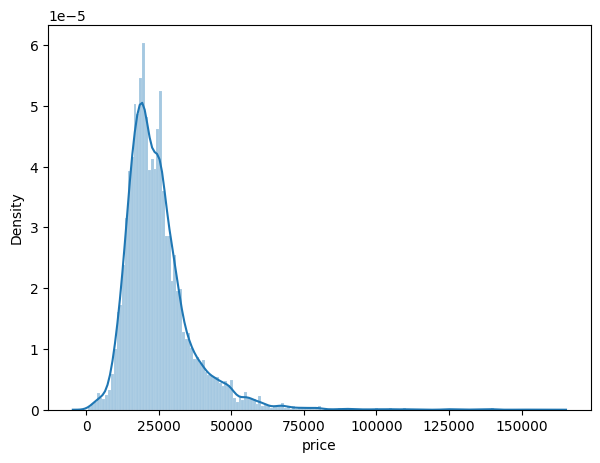

In [6]:
plt.figure(figsize=(7,5))
sbn.histplot(
    df["price"], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

In [7]:
#plt.figure(figsize=(7,5))
#sbn.distplot(df["price"])

<Axes: xlabel='year', ylabel='count'>

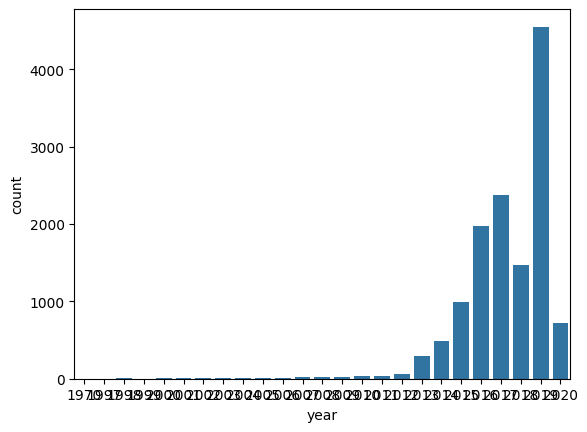

In [8]:
sbn.countplot(df, x="year")

In [9]:
# we have string value so just get numeric to see correlation
df_for_corr = df.select_dtypes(exclude=[object])
df_for_corr.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [10]:
# we looking what affects price
# mosty year and engine size
df_for_corr.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<Axes: xlabel='mileage', ylabel='price'>

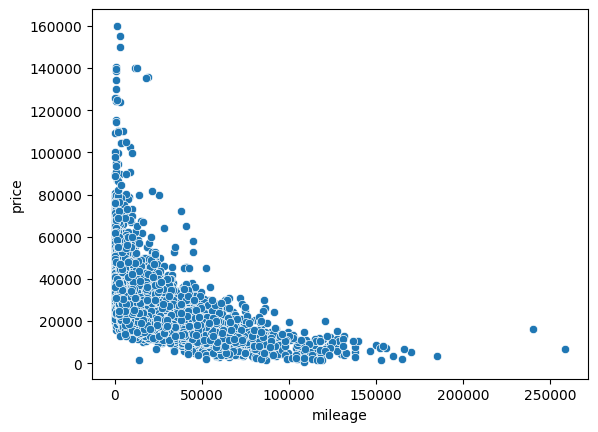

In [11]:
sbn.scatterplot(x="mileage", y="price", data=df)

 # 2.Data cleansing <a class="anchor" id="2"></a>

In [12]:
# most expensive
df.sort_values("price", ascending=False).head()

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0


In [13]:
# cheapest
df.sort_values("price", ascending=True).head()

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8


In [14]:
len(df)

13119

In [15]:
len(df)*0.01

131.19

In [16]:
# delete most expensive 131 values(cars) to clean data for model

In [17]:
df.sort_values("price", ascending=False).iloc[131:]

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [18]:
ninetynine_percent_df=df.sort_values("price", ascending=False).iloc[131:]

In [19]:
ninetynine_percent_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


<Axes: xlabel='price', ylabel='Count'>

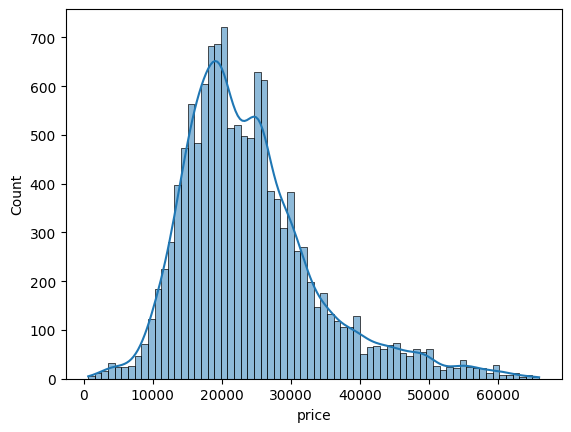

In [20]:
sbn.histplot(
    ninetynine_percent_df["price"], kde=True
)

In [21]:
#
df_for_corr.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [22]:
df_for_corr[df_for_corr  != 1970].groupby("year").mean()["price"]

year
1997.0     9995.000000
1998.0     8605.000000
1999.0     5995.000000
2000.0     5743.333333
2001.0     4957.900000
2002.0     5820.444444
2003.0     4878.000000
2004.0     4727.615385
2005.0     4426.111111
2006.0     4036.875000
2007.0     5136.045455
2008.0     6967.437500
2009.0     6166.764706
2010.0     8308.473684
2011.0    12624.894737
2012.0    10845.140351
2013.0    11939.842466
2014.0    14042.936864
2015.0    16731.780020
2016.0    19307.892948
2017.0    21514.307854
2018.0    25720.162918
2019.0    31290.020865
2020.0    35433.282337
Name: price, dtype: float64

In [23]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [24]:
df=ninetynine_percent_df

In [25]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [26]:
#df = df.select_dtypes(exclude=[object])
df=df.drop("transmission",axis=1)

In [27]:
df=df[df["year"]  != 1970]

In [28]:
df.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [29]:
df.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


# 3.Create  model <a class="anchor" id="3"></a>

In [30]:
# get data as y & x

In [31]:
y = df["price"].values
x = df.drop("price", axis=1).values

In [32]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [33]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=10)

In [36]:
len(x_train)

9090

In [37]:
len(x_test)

3897

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
x_train = scaler.fit_transform(x_train)

In [41]:
x_test= scaler.fit_transform(x_test)

In [42]:
x_train.shape

(9090, 5)

In [43]:
model = Sequential()

model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")


In [44]:
model.fit(x=x_train, y= y_train, validation_data=(x_test,y_test),batch_size=250,epochs=300)

Epoch 1/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 677306752.0000 - val_loss: 688110592.0000
Epoch 2/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 670496640.0000 - val_loss: 688092544.0000
Epoch 3/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 669523712.0000 - val_loss: 688028352.0000
Epoch 4/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 664050112.0000 - val_loss: 687774592.0000
Epoch 5/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 664646208.0000 - val_loss: 686941568.0000
Epoch 6/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 669382784.0000 - val_loss: 684694848.0000
Epoch 7/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 675680512.0000 - val_loss: 679615808.0000
Epoch 8/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 668035520.0000 - val_loss: 669635712.0000
Epoch 9/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 643397568.0000 - val_loss: 651960384.0000
Epoch 10/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 629573312.0000 

In [45]:
losses_data = pd.DataFrame(model.history.history)

In [46]:
losses_data.head()

,loss,val_loss
0,672149312.0,688110592.0
1,672138368.0,688092544.0
2,672104128.0,688028352.0
3,671972800.0,687774592.0
4,671498944.0,686941568.0


<Axes: >

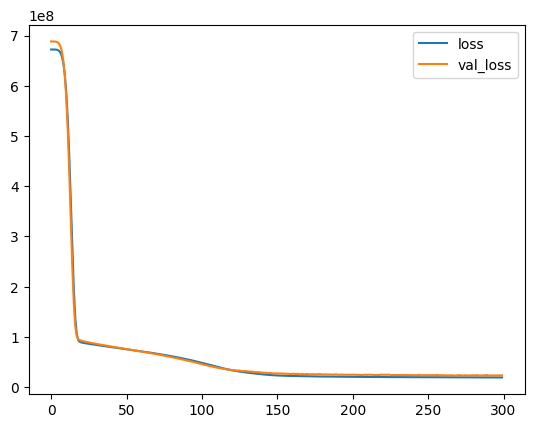

In [47]:
losses_data.plot()

In [48]:
predsSeries = model.predict(x_test)

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step


In [49]:
predsSeries

array([[20746.35 ],
       [23083.377],
       [24461.672],
       ...,
       [25065.812],
       [ 9725.752],
       [24086.814]], dtype=float32)

In [50]:
mean_absolute_error(y_test, predsSeries)

3391.406587392696

plt.scatter(y_test, predsSeries)
plt.plot(y_test,y_test,"r")

# 4.Predict price <a class="anchor" id="4"></a>

In [51]:
# test for a car price

In [52]:
# this is a car whose price we're going to predict
df.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [53]:
newcarSeries = df.drop("price", axis=1).iloc[2]

In [54]:
type(newcarSeries)

pandas.core.series.Series

In [55]:
newcarSeries=scaler.transform(newcarSeries.values.reshape(-1,5))

In [56]:
model.predict(newcarSeries)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[60982.996]], dtype=float32)